### Importing libraries and files

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import pandas as pd

#Reading the .csv file of the phone data into a dataframe
df_phonedata = pd.read_csv('/content/drive/My Drive/NLPCapstoneProjectUpgrad/Cell_Phones_and_Accessories_5.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file. 'sentiment_analysis' is the folder name under 'My Drive'
path1 = '/content/drive/My Drive/NLPCapstoneProjectUpgrad/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/drive/My Drive/NLPCapstoneProjectUpgrad/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [7]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries. 
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open('/content/drive/My Drive/NLPCapstoneProjectUpgrad/meta_Cell_Phones_and_Accessories.json', 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [8]:
# Getting the number of entries in the phonemetadata list

len(phonemetadata)

590071

In [9]:
#converting the list phonemetadata into a data frame
df_metadata=pd.DataFrame(phonemetadata)

copy_of_df_metadata = df_metadata.copy()

In [10]:
df_metadata.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273


### Cleaning df_metadata

In [11]:
df_metadata.shape

(590071, 18)

In [12]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590071 entries, 0 to 590070
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      590071 non-null  object
 1   tech1         590071 non-null  object
 2   description   590071 non-null  object
 3   fit           590071 non-null  object
 4   title         590071 non-null  object
 5   also_buy      590071 non-null  object
 6   image         590071 non-null  object
 7   tech2         590071 non-null  object
 8   brand         590071 non-null  object
 9   feature       590071 non-null  object
 10  rank          590071 non-null  object
 11  also_view     590071 non-null  object
 12  details       590071 non-null  object
 13  main_cat      590071 non-null  object
 14  similar_item  590071 non-null  object
 15  date          590071 non-null  object
 16  price         590071 non-null  object
 17  asin          590071 non-null  object
dtypes: object(18)
memory usa

All the columns are of object type which is required, but the dataset does have null values. It's just that null values are replaced in the dataset by an empty list. So I will replace all empty lists and empty dictionaries with nulls and check info again. 

In [13]:
# Making every column that returns False in .astype(bool) with NULL. False means that there is no data in that cell.
df_metadata = df_metadata.mask(~df_metadata.astype(bool))

In [14]:
df_metadata.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",NaN,NaN,NaN,Trollies Sing a Long Party VHS,NaN,NaN,NaN,NaN,NaN,"557,379 in Movies & TV (",NaN,{'ASIN: ': '6303195164'},Movies & TV,NaN,NaN,NaN,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",NaN,NaN,NaN,La Pura VHS,NaN,NaN,NaN,Maribel Guardia,NaN,"1,024,449 in Movies & TV (",NaN,{'ASIN: ': '630524412X'},Movies & TV,NaN,NaN,NaN,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",NaN,"[New items to give you a new good mood, welcom...",NaN,Leopard Thanksgiving Easter PC Black Case for ...,NaN,NaN,NaN,NaN,NaN,"5,315,017 in Books (",NaN,"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,NaN,NaN,NaN,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",NaN,"[A brand-new, unused, unopened, undamaged item...",NaN,Puppies Faceplate Hard Case Protector for Net1...,NaN,NaN,NaN,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",NaN,NaN,Cell Phones & Accessories,NaN,NaN,NaN,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",NaN,"[A brand-new, unused, unopened, undamaged item...",NaN,White Wolf Faceplate Protector Hard Case for S...,NaN,NaN,NaN,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",NaN,NaN,Cell Phones & Accessories,NaN,NaN,NaN,6786501273


In [15]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590071 entries, 0 to 590070
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      534466 non-null  object
 1   tech1         6585 non-null    object
 2   description   399219 non-null  object
 3   fit           43 non-null      object
 4   title         590062 non-null  object
 5   also_buy      44263 non-null   object
 6   image         451795 non-null  object
 7   tech2         231 non-null     object
 8   brand         577360 non-null  object
 9   feature       391198 non-null  object
 10  rank          530914 non-null  object
 11  also_view     48497 non-null   object
 12  details       11904 non-null   object
 13  main_cat      586685 non-null  object
 14  similar_item  50931 non-null   object
 15  date          45880 non-null   object
 16  price         127564 non-null  object
 17  asin          590071 non-null  object
dtypes: object(18)
memory usa

Since we only want to inspect data for cell phones and not accessories, I will keep only the values which have 'Cell Phones' as the second element in the category column.

In [16]:
# Since the number of nulls in the category column is very less ~10%, I will drop those rows.

df_metadata.dropna(subset=['category'], inplace=True)

In [17]:
# Making a new list of the second item in the list of elements of column category

newcat = []
for index,row in df_metadata.category.iteritems():
  newcat.append(row[1])

In [18]:
# Substituting the maincategory to the dataframe

df_metadata['maincategory'] = newcat

In [19]:
# I will extract only those rows with maincategory as Cell Phones and work only on them

df_meta = df_metadata.loc[df_metadata['maincategory'] == 'Cell Phones']

In [20]:
df_meta.head(2)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,maincategory
36,"[Cell Phones & Accessories, Cell Phones, Unloc...",NaN,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",NaN,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,NaN,[https://images-na.ssl-images-amazon.com/image...,NaN,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",NaN,NaN,Cell Phones & Accessories,NaN,NaN,NaN,8050110508,Cell Phones
1274,"[Cell Phones & Accessories, Cell Phones, Unloc...",NaN,[Standard package: 1 x original phone 1 x Qual...,NaN,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",[https://images-na.ssl-images-amazon.com/image...,NaN,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",NaN,All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",NaN,B00005KBGR,Cell Phones


In [21]:
df_meta.shape

(9823, 19)

Using the also_view and also_buy column to extract info about competitor brands.

## also_view and also_buy column manipulation

In [22]:
# Making a list of all the unique item codes in the also_view column of the dataset

also_view_na_dropped = df_meta['also_view'].dropna()
also_viewList = [item for t in also_view_na_dropped for item in t]
# also_viewList

In [23]:
# Making a list of all the unique item codes in the also_buy column of the dataset

also_buy_na_dropped = df_meta['also_buy'].dropna()
also_buyList = [item for t in also_buy_na_dropped for item in t]
# also_buyList

In [24]:
# Making one list for all competitors of view and buy

also_viewList.extend(also_buyList)
alsoList = list(set(also_viewList))

In [25]:
# Making a list of values in alsoList and in asin column of dataset so I can check the competitor brands and features etc

competitorList = []

for value in df_meta['asin']:
  if value in alsoList:
    competitorList.append(value)

competitorList = list(set(competitorList))

In [26]:
# Saving all competitor details in new dataframe 'competitorDetails'

competitorDetails = df_meta[df_meta.asin.isin(competitorList)]

In [27]:
# Dropping columns not needed for analysis from competitor dataset

competitorDetails.drop(['category','tech1','fit','also_buy','image','also_view','tech2','rank','details','main_cat','similar_item','date','price','maincategory'],
                       axis = 'columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
competitorDetails.head()

,description,title,brand,feature,asin
1274,[Standard package: 1 x original phone 1 x Qual...,Nokia 3310 Blue Nokia,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...",B00005KBGR
1540,"[Compatible with Cingular cell phone service, ...",Nokia 3595 Phone (AT&amp;T),Nokia,NaN,B0001TDH50
1989,[Standard package: 1 x original phone 1 x Qual...,Nokia 3310 Blue Nokia,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...",B00005KBGR
2255,"[Compatible with Cingular cell phone service, ...",Nokia 3595 Phone (AT&amp;T),Nokia,NaN,B0001TDH50
2599,"[If you're in your car a lot, this is the phon...",LG VX4500 Phone (Verizon Wireless),LG,NaN,B00065982U


In [29]:
# Checking nulls
(competitorDetails.isna().sum())*100/(competitorDetails.shape[0])

description    4.220009
title          0.000000
brand          0.806069
feature        5.026079
asin           0.000000
dtype: float64

In [30]:
# Dropping nulls
competitorDetails.dropna(subset=['description','feature','brand'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# Saving competitorDetails dataframe as csv in drive

competitorDetails.to_csv('/content/drive/My Drive/NLPCapstoneProjectUpgrad/competitorDetails.csv', index=False)

The competitor dataset has been analysed in detail later while doing the Competitor analysis.

In [32]:
#Percentage of nulls per column in dataset in new dataset

(df_meta.isna().sum())*100/(df_meta.shape[0])

category          0.000000
tech1            99.684414
description      12.765957
fit             100.000000
title             0.000000
also_buy         81.370253
image            18.191998
tech2            99.908378
brand             1.282704
feature          14.038481
rank              1.964777
also_view        67.311412
details          97.556755
main_cat          0.142523
similar_item     70.131324
date             97.566935
price            82.235570
asin              0.000000
maincategory      0.000000
dtype: float64

tech1, fit, tech2, details, similar_item, date all have huge amount of nulls(more than 90% values are nulls). These ccolumns cannot give us any useful information with so many nulls, so dropping them. Also dropping image and description column since they too have some nulls and do not give us essential information anyway. 'also_view' and 'also_buy' are also used to extract competitor information, so dropping them too.

In [33]:
df_meta.drop(['tech1', 'fit', 'also_view', 'also_buy', 'tech2', 'details', 'similar_item', 'date', 'image', 'description'], axis='columns', inplace=True)

# df_metadata.loc[df_metadata['fit'].notnull()].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
#Checking Percentage of nulls per column in dataset again

(df_meta.isna().sum())*100/(df_meta.shape[0])

category         0.000000
title            0.000000
brand            1.282704
feature         14.038481
rank             1.964777
main_cat         0.142523
price           82.235570
asin             0.000000
maincategory     0.000000
dtype: float64

In [35]:
# Creating a column for the second value that category shows- whether the cell phone is an unlocked phone or carrier phone
# unlocked phone means that phone is not locked to any partiular carrier
# Carrier phones will be locked to run only on a particular network for a specified period of time

import numpy as np

CellPhoneCategory = []
for index,row in df_meta.category.iteritems():
  if len(row)>2:
    CellPhoneCategory.append(row[2])
  else:
    CellPhoneCategory.append(np.nan)

df_meta['CellPhoneCategory'] = CellPhoneCategory

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
df_meta.head(2)

,category,title,brand,feature,rank,main_cat,price,asin,maincategory,CellPhoneCategory
36,"[Cell Phones & Accessories, Cell Phones, Unloc...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",Cell Phones & Accessories,NaN,8050110508,Cell Phones,Unlocked Cell Phones
1274,"[Cell Phones & Accessories, Cell Phones, Unloc...",Nokia 3310 Blue Nokia,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...",All Electronics,NaN,B00005KBGR,Cell Phones,Unlocked Cell Phones


I have extracted everything we needed from category column, so dropping it. 'main_cat' column has also become redundant after extraction of categories from category column. So dropping 'main_cat' column as well.

In [37]:
df_meta.drop(['category', 'main_cat'], axis = 'columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Working on the rank column- rank column contains list elements just like category column had. I will separate the different element after some processing.

In [38]:
# Removing the text in brackets- (See Top 100 in Cell Phones & Accessories) using regex and extracting the first part of ranking and appending it to df

import regex as re

ranklist = []
for index, row in df_meta['rank'].iteritems():
  # print('in loop 1')
  # print(row)
  if (type(row) == list):
    # print(type(row))
    # print(row[0])
    ranklist.append(re.findall('(.*?)\(.*', row[0]))
  else:
    ranklist.append(row)

In [39]:
df_meta['major_rank'] = ranklist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_meta.head(3)

,title,brand,feature,rank,price,asin,maincategory,CellPhoneCategory,major_rank
36,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",NaN,8050110508,Cell Phones,Unlocked Cell Phones,"[>#6,356,920 in Cell Phones & Accessories ]"
1274,Nokia 3310 Blue Nokia,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...",NaN,B00005KBGR,Cell Phones,Unlocked Cell Phones,"[>#32,759 in Electronics ]"
1295,Nokia 5180i TracFone Prepaid Cell Phone with 1...,Nokia,NaN,NaN,NaN,B00005S0M4,Cell Phones,NaN,NaN


In [41]:
# Extracting the second part of ranking and appending it to df

import regex as re

ranklist2 = []
for index, row in df_meta['rank'].iteritems():
  # print('in loop 1')
  # print(row)
  if (type(row) == list) and (len(row)>1):
    text1 = (row[1][2:]).split(' > ')
    ranklist2.append((text1[0].split('in '))[0] +'in '+ text1[1])
  elif ((type(row) == list)):
    # print('nan')
    ranklist2.append(np.nan)
  else:
    # print('nan')
    ranklist2.append(row)

In [42]:
df_meta['minor_rank'] = ranklist2
# df_meta.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
# Since I have already extracted the required details from rank column, dropping it

df_meta.drop(['rank'], axis = 'columns', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
df_meta.head(3)

,title,brand,feature,price,asin,maincategory,CellPhoneCategory,major_rank,minor_rank
36,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...",NaN,8050110508,Cell Phones,Unlocked Cell Phones,"[>#6,356,920 in Cell Phones & Accessories ]","32,868 in Unlocked Cell Phones"
1274,Nokia 3310 Blue Nokia,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...",NaN,B00005KBGR,Cell Phones,Unlocked Cell Phones,"[>#32,759 in Electronics ]","1,430 in Cell Phones & Accessories"
1295,Nokia 5180i TracFone Prepaid Cell Phone with 1...,Nokia,NaN,NaN,B00005S0M4,Cell Phones,NaN,NaN,NaN


In [45]:
#Converting the major_rank column from column of lists to column of strings

major_rank = []

for row in df_meta['major_rank']:
  if type(row) == list:
    major_rank.append((','.join(map(str,row)))[2:-1])
  else:
    major_rank.append(row)

In [46]:
# Substituting the column major_rank with the above formed list major_rank

df_meta['major_rank'] = major_rank

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
df_meta.head(2)

,title,brand,feature,price,asin,maincategory,CellPhoneCategory,major_rank,minor_rank
36,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...",NaN,8050110508,Cell Phones,Unlocked Cell Phones,"6,356,920 in Cell Phones & Accessories","32,868 in Unlocked Cell Phones"
1274,Nokia 3310 Blue Nokia,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...",NaN,B00005KBGR,Cell Phones,Unlocked Cell Phones,"32,759 in Electronics","1,430 in Cell Phones & Accessories"


In [48]:
# Number of unique values in 'asin' column vs. shape of df_meta dataset

print(df_meta.asin.nunique(), df_meta.shape)

9789 (9823, 9)


asin column has duplicate values. Since asin is unique for each product, it means there are duplicate records in the dataset. Removing those duplicates.

In [49]:
# Removing duplicates from the asin column of dataset

df_meta.drop_duplicates(subset=['asin'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
df_meta.shape

(9789, 9)

Now the dataset as 9789 records. On checking with unique number of values we find that it is correct.

In [51]:
df_meta.head(3)

,title,brand,feature,price,asin,maincategory,CellPhoneCategory,major_rank,minor_rank
36,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...",NaN,8050110508,Cell Phones,Unlocked Cell Phones,"6,356,920 in Cell Phones & Accessories","32,868 in Unlocked Cell Phones"
1274,Nokia 3310 Blue Nokia,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...",NaN,B00005KBGR,Cell Phones,Unlocked Cell Phones,"32,759 in Electronics","1,430 in Cell Phones & Accessories"
1295,Nokia 5180i TracFone Prepaid Cell Phone with 1...,Nokia,NaN,NaN,B00005S0M4,Cell Phones,NaN,NaN,NaN


In [52]:
# Checking number of nulls per column

(df_meta.isna().sum())*100/(df_meta.shape[0])

title                 0.000000
brand                 1.256512
feature              13.893145
price                82.194300
asin                  0.000000
maincategory          0.000000
CellPhoneCategory     1.399530
major_rank            1.951170
minor_rank            2.155481
dtype: float64

In [53]:
# COnverting the lists in feature column to strings, keeping nulls intact

featureList = []
for row in df_meta['feature']:
  if type(row) == list:
    featureList.append((','.join(map(str,row)))[0:-1])
  else:
    featureList.append(row)

df_meta['feature'] = featureList
df_meta.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,title,brand,feature,price,asin,maincategory,CellPhoneCategory,major_rank,minor_rank
36,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,Ice,"2G NETWORK, Quad Band: GSM 850/900/1800/1900 M...",NaN,8050110508,Cell Phones,Unlocked Cell Phones,"6,356,920 in Cell Phones & Accessories","32,868 in Unlocked Cell Phones"
1274,Nokia 3310 Blue Nokia,Nokia,"GSM 900/1800,Simple and elegant,Classic model,...",NaN,B00005KBGR,Cell Phones,Unlocked Cell Phones,"32,759 in Electronics","1,430 in Cell Phones & Accessories"
1295,Nokia 5180i TracFone Prepaid Cell Phone with 1...,Nokia,NaN,NaN,B00005S0M4,Cell Phones,NaN,NaN,NaN


In [54]:
# Checking for duplicates

df_dup = df_meta[df_meta.duplicated(keep = 'first')]
df_dup.shape

(0, 9)

As we can see no more duplicates exist, so majority preprocessing on df_meta dataset is done. Moving on to df_phonedata dataset.

In [55]:
# Saving the df_meta dataframe to the drive for future easy downloading

df_meta.to_csv('/content/drive/My Drive/NLPCapstoneProjectUpgrad/df_meta.csv', index=False)

In [56]:
# Download clean df_meta dataset from here

import pandas as pd

df_meta = pd.read_csv('/content/drive/My Drive/NLPCapstoneProjectUpgrad/df_meta.csv')

## Cleaning df_phonedata csv

In [57]:
df_phonedata.head(3)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE


In [58]:
(df_phonedata.reviewerID.nunique(), df_phonedata.asin.nunique(), df_phonedata.shape)

(157212, 48186, (1128437, 12))

In [59]:
# Checking for duplicate records in dataset

duplicateRowsDF = df_phonedata[df_phonedata.duplicated(keep = 'first')]
duplicateRowsDF.shape

(3451, 12)

There are 3451 fully duplicate records that I will drop.

In [60]:
# Removing duplicates

df_phonedata.drop_duplicates(keep = 'first', inplace=True)

In [61]:
# Checking nulls epr column
(df_phonedata.isna().sum())*100/(df_phonedata.shape[0])

overall              0.000000
verified             0.000000
reviewerID           0.000000
asin                 0.000000
style               46.277376
reviewerName         0.013867
reviewText           0.068179
summary              0.046667
unixReviewTime       0.000000
vote                91.863632
image               97.592414
review_sentiment     0.000000
dtype: float64

'image' column is of no use to us since this is a text classification, and it anyways has 97% nulls, dropping it. Dropping nulls in reviewText and summary columns.

In [62]:
# Dropping image column from dataset df_phonedata
df_phonedata.drop(['image'], axis='columns', inplace=True)

# Dropping nulls of reviewText, reviewerName and summmary column
df_phonedata.dropna(subset =['reviewText','summary'], inplace=True)

In [63]:
# Converting unix time to normal time

df_phonedata.unixReviewTime = pd.to_datetime(df_phonedata['unixReviewTime'], unit='s')

In [64]:
df_phonedata.head(3)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,2014-08-04,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,2014-02-12,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,2014-02-08,NaN,NEGATIVE


In [65]:
# Keeping only cell phone values in df_phonedata

df_phonedata = df_phonedata[df_phonedata['asin'].isin(df_meta['asin'])]

In [66]:
df_phonedata.shape

(63438, 11)

In [67]:
# Saving the df_phonedata

df_phonedata.to_csv('/content/drive/MyDrive/NLPCapstoneProjectUpgrad/df_phonedata.csv', index=False)

In [68]:
# Saving asins of top 100 cell phones in a list

Top_100_cellphones = df_phonedata.groupby('asin').count().sort_values(by='overall',ascending=False).head(100).index

In [69]:
# Merging the df_meta and df_phonedata dataframes on asin column

mergedMetaPhone = pd.merge(left = df_meta, right = df_phonedata, how = 'right', on='asin')
print(mergedMetaPhone.shape, mergedMetaPhone.asin.nunique())

(63438, 19) 2218


In [70]:
# extracting top 100 most reviewed cell phones data from merged dataframe and saving in another dataframe to analyse features

df_top100Cellphones = mergedMetaPhone[mergedMetaPhone['asin'].isin(Top_100_cellphones)]
df_top100Cellphones.shape

(20625, 19)

About one-third of our data merged data is about top 100 cellphones out of 2218 cellphones.

In [71]:
# For feature column of top 100 reviewed cell phones

# df_top100Cellphones.feature.nunique()

# df_top100Cellphones['feature'].str.split(",", expand = True) 


In [72]:
import numpy as np

# Removing $ sign from the price column values
mergedMetaPhone['price'] = mergedMetaPhone['price'].str.replace(r'$', '')

# Price column has some bad values, shown in the unique list at index 1
# mergedMetaPhone.price.unique()[1]

# Making a list of all the bad values in price column
index = mergedMetaPhone[(mergedMetaPhone['price'] == mergedMetaPhone.price.unique()[1])].index

# Replacing all the bad values in price column with nulls
mergedMetaPhone.loc[index, 'price'] = np.nan

# One of the indexes at which the bad value in price column was there, for a before after comparision
# mergedMetaPhone.iloc[65]

In [73]:
# replacing the only value with , in them to price value without ,
mergedMetaPhone['price'] = mergedMetaPhone['price'].replace(['1,150.00'],'1150.00')

# Converting all price values from string to float
mergedMetaPhone['price'] = mergedMetaPhone['price'].astype(float)

In [74]:
# first creating a dataframe without any nulls and then plotting a histogram of the non null prices

import plotly.express as px
fig = px.histogram(mergedMetaPhone, x='price', range_x=[0, 500])
fig.show()

1. Most purchased phones are on the cheaper side: 100-150$.
2. Price column is right skewed.

In [75]:
fig = px.box(mergedMetaPhone, y=mergedMetaPhone['price'])
fig.show()

will apply standardising on the price column to take care of outliers.

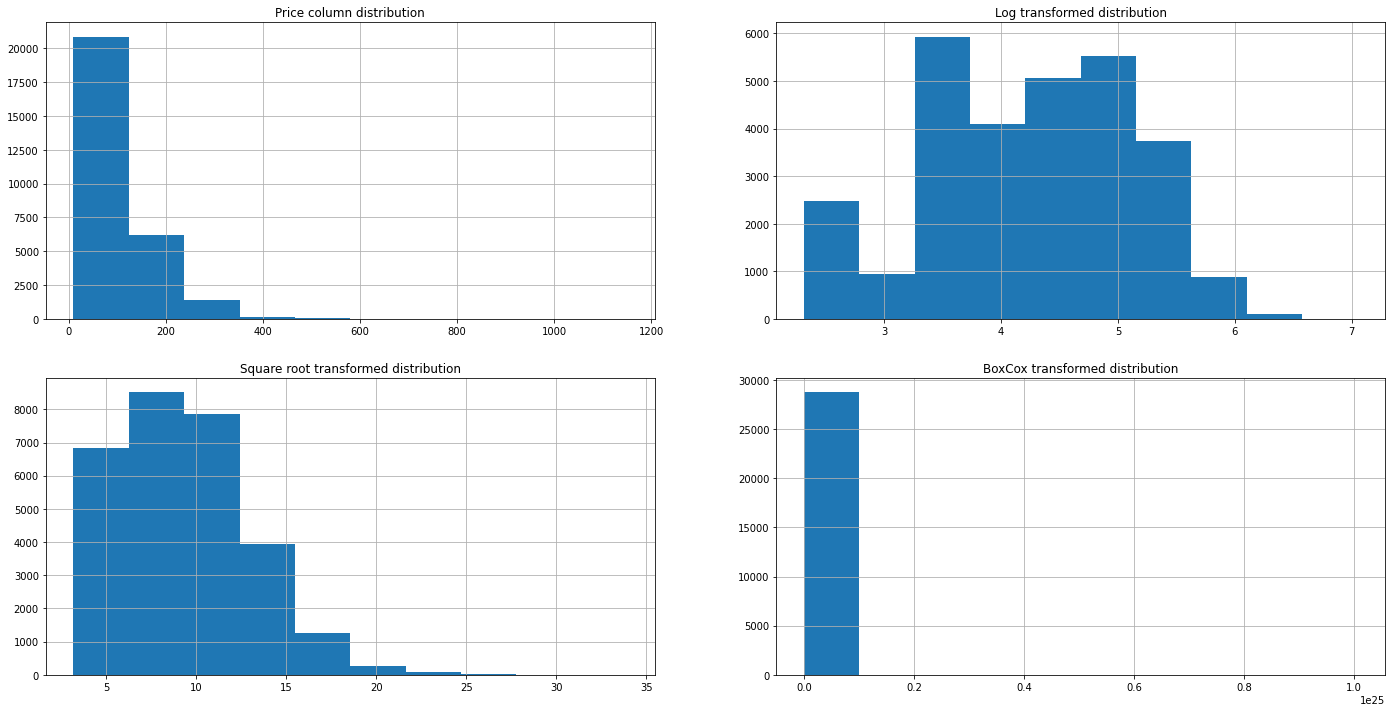

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))

ax1 = plt.subplot(2,2,1)
ax1 = pd.Series(mergedMetaPhone['price']).hist()
plt.title('Price column distribution')

ax2 = plt.subplot(2,2,2)
mergedMetaPhone['price'].replace(0, 1, inplace=True)
ax2 = pd.Series(np.log(mergedMetaPhone['price'])).hist()
plt.title('Log transformed distribution')

ax3 = plt.subplot(2,2,3)
ax3 = pd.Series(np.sqrt(mergedMetaPhone['price'])).hist()
plt.title('Square root transformed distribution')

from scipy import stats

ax4 = plt.subplot(2,2,4)
x_bc, lmda = stats.boxcox(mergedMetaPhone['price'])
ax4 = pd.Series(x_bc).hist()
plt.title('BoxCox transformed distribution')

plt.show()

will go ahead with the square root transformation because its graph resembles normal distribution most closely.

In [77]:
# Standardising price column using square root transform

# mergedMetaPhone['price'], lmda = stats.boxcox(mergedMetaPhone['price'])
mergedMetaPhone.insert(len(mergedMetaPhone.columns), 'A_Sqrt', np.sqrt(mergedMetaPhone.loc[:,'price']))

fig = px.histogram(mergedMetaPhone, x='A_Sqrt')

fig.update_layout(
    # margin=dict(l=10, r=10, t=30, b=7),
    paper_bgcolor="LightSteelBlue",
    title='Price variable after applying square root transform transform'
)

fig.show()

In [78]:
# Making a comparision between the two categories of cell phoens- carrier and unlocked

print(mergedMetaPhone.groupby(by='CellPhoneCategory').median()['price'], mergedMetaPhone.groupby(by='CellPhoneCategory').count()['title'])

CellPhoneCategory
Carrier Cell Phones     84.95
Unlocked Cell Phones    74.99
Name: price, dtype: float64 CellPhoneCategory
Carrier Cell Phones     14097
Unlocked Cell Phones    47595
Name: title, dtype: int64


1. Far more unlocked cell phones sold than carries phones.
2. Median price of carrier cell phones is slightly more than that of unlocked cell phones, which is very surprising, because unlocked cell phones should cost more, being not attached to any network carrier.

In [79]:
# Saving the mergedMetaPhone dataframe to the drive for future easy downloading

mergedMetaPhone.to_csv('/content/drive/My Drive/NLPCapstoneProjectUpgrad/mergedMetaPhone.csv', index=False)

In [80]:
# Download clean mergedMetaPhone dataset from here

import pandas as pd

mergedMetaPhone = pd.read_csv('/content/drive/My Drive/NLPCapstoneProjectUpgrad/mergedMetaPhone.csv')

## Review corpus

### Creating stopword lists

In [81]:
# Importing stopwords, positive words and negative words list from drive
import pandas as pd
stopwords_list = pd.read_csv('/content/drive/MyDrive/NLPCapstoneProjectUpgrad/stop_words_long.txt')
stopwords_list = stopwords_list['a'].to_list()

pos_words = pd.read_csv('/content/drive/MyDrive/NLPCapstoneProjectUpgrad/pos_words.txt')
pos_words = pos_words['a+'].to_list()

neg_words = pd.read_csv('/content/drive/MyDrive/NLPCapstoneProjectUpgrad/neg_words.txt')
neg_words = neg_words['against'].to_list()

# A small list of data specific stop words to be removed too
other_common_words = ['phone','smartphone', 'product','item', 'cell', 'mobile']

In [82]:
# First appending the other_common_words to stopwords_list
stopwords_list.extend(other_common_words)

# Creating cosolidated lists for positive and negative reviews for faster processing
pos_words.extend(stopwords_list)
neg_words.extend(stopwords_list)

### text Cleaning on the review dataframe before splitting into positive/negative

In [83]:
# Calculating percentage of postive vs. negative reviews in the text

pos_neg_valuecounts = mergedMetaPhone['review_sentiment'].value_counts()

print('Positive review % is: ', (pos_neg_valuecounts[0]*100/(pos_neg_valuecounts[0]+pos_neg_valuecounts[1])))
print('Negative review % is: ', (pos_neg_valuecounts[1]*100/(pos_neg_valuecounts[0]+pos_neg_valuecounts[1])))

Positive review % is:  74.71389388063936
Negative review % is:  25.286106119360635


In [84]:
# Creating new dataframe containing only review text and review sentiment columns
# Creating positive and negative sentiments different dataframes

reviewTextSentiment = mergedMetaPhone[['reviewText', 'review_sentiment']].copy()

In [85]:
reviewTextSentiment.head()

,reviewText,review_sentiment
0,This phone is ugly and heavy and has a terribl...,NEGATIVE
1,I had the Samsung V205 and then I decided to t...,POSITIVE
2,This is the first Samsung phone I have had and...,NEGATIVE
3,"..and I'm from Europe, where the phones and ne...",POSITIVE
4,This phone is amazingly small and light for a ...,POSITIVE


In [86]:
# Converting all reviewText to lowercase
reviewTextSentiment['reviewText'] = reviewTextSentiment['reviewText'].apply(lambda x: x.lower())

In [87]:
import re

# Splitting reviewText by punctuation
reviewTextSentiment['reviewText'] = reviewTextSentiment['reviewText'].apply(lambda x: re.split('[., ]',x))

# Joining all the lists to form strings for further analysis
reviewTextSentiment['reviewText'] = reviewTextSentiment['reviewText'].apply(lambda x: ' '.join(x))

In [88]:
# Removing numbers and characters from the text
reviewTextSentiment['reviewText'] = reviewTextSentiment['reviewText'].apply(lambda x: re.sub('[^A-z]',' ',x))
# positiveReview['newreviewText'] = positiveReview['reviewText'].apply(lambda x: ' '.join(x))

In [89]:
reviewTextSentiment.head()

,reviewText,review_sentiment
0,this phone is ugly and heavy and has a terribl...,NEGATIVE
1,i had the samsung v and then i decided to t...,POSITIVE
2,this is the first samsung phone i have had and...,NEGATIVE
3,and i m from europe where the phones and ne...,POSITIVE
4,this phone is amazingly small and light for a ...,POSITIVE


### Splitting into positive and negative dataset

In [90]:
# Splitting reviewTextSentiment into positive and negative reviews

positiveReview = reviewTextSentiment.loc[reviewTextSentiment['review_sentiment'] == 'POSITIVE']
negativeReview = reviewTextSentiment.loc[reviewTextSentiment['review_sentiment'] == 'NEGATIVE']

In [91]:
reviewTextSentiment.head()

,reviewText,review_sentiment
0,this phone is ugly and heavy and has a terribl...,NEGATIVE
1,i had the samsung v and then i decided to t...,POSITIVE
2,this is the first samsung phone i have had and...,NEGATIVE
3,and i m from europe where the phones and ne...,POSITIVE
4,this phone is amazingly small and light for a ...,POSITIVE


In [92]:
# Importing necessary libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

# tokenization library
import nltk
nltk.download('punkt')

# stopwords library
nltk.download('stopwords')

# Stemming libraries
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

# Lemmatizer library
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [93]:
# Setting the reviewtext column of the reviewTextSentiment dataframe as document
Posdocuments = positiveReview['reviewText']
Negdocuments = negativeReview['reviewText']

In [94]:
print(Posdocuments.shape, Posdocuments.nunique())
print(Negdocuments.shape, Negdocuments.nunique())

(47397,) 35847
(16041,) 10665


In [95]:
import regex as re

# Creating the word corpus for the positive review text

def preprocess(document, positive_words, negative_words, pos):
    'changes document to lower case and removes stopwords'

    # tokenize into words
    words = word_tokenize(document)

    # Removing single characters
    words = [word for word in words if len(word) > 1]

    # Lemmatizing all the words
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    # remove stop words
    if (pos == 1):
      words = [word for word in words if word not in positive_words]
    else:
      words = [word for word in words if word not in negative_words]

    # join words to make sentence
    document = " ".join(words)
    
    return document

Posdocuments = [preprocess(document, pos_words, neg_words, 1) for document in Posdocuments]
Negdocuments = [preprocess(document, pos_words, neg_words, 0) for document in Negdocuments]

#### Most common words in positive documents

In [96]:
# Checking the top 50 most frequently occuring words in the Posdocuments corpus
frequency_dist = nltk.FreqDist(Posdocuments)

for word, frequency in frequency_dist.most_common(50):
    print(u'{};{}'.format(word, frequency))

;10673
ok;770
price;474
seller;176
buy;150
quality;109
condition;88
expect;87
deal;81
ship;77
service;72
purchase;71
cellphone;65
look;47
okay;45
describe;41
money;41
gift;38
no problems;36
please;34
cheap;34
delivery;33
time;33
son;33
wife;31
no issue;30
device;30
value;29
venezuela;28
daughter;28
not bad;25
iphone;24
lot;22
camera;22
arrive time;22
little;21
feature;20
responsible;19
battery life;19
arrive condition;18
meet expectations;18
quality price;18
husband;18
choice;17
sale;17
recomended;16
samsung;16
job;15
recomendado;15
exactly describe;15


In [97]:
# Identifying top 50 common words from Posdocuments corpus using another code
freq = pd.Series(' '.join(Posdocuments).split()).value_counts()
freq[:50]

not         33479
screen      20323
battery     15849
no          14213
camera      13156
buy         11708
time        10584
apps        10101
android      9631
price        9102
don          8751
look         8749
call         8451
card         8386
feature      7683
samsung      7398
quality      7315
iphone       7250
life         6783
ve           6633
update       6561
charge       6327
note         5758
device       5646
issue        5566
gb           5557
sim          5436
app          5234
lot          5038
day          4751
feel         4748
galaxy       4711
run          4709
purchase     4702
little       4655
button       4609
size         4537
lg           4453
picture      4435
try          4427
review       4349
data         4251
service      4034
google       3968
unlock       3797
hand         3783
amazon       3738
doesn        3736
play         3689
windows      3648
dtype: int64

#### Vectorizing positive reviews data using tf-idf

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(Posdocuments)
# print(tfidf_model)  # returns the row number and column number of cells which have 1 as value

In [99]:
# Summing the sparse matrix of vectorizer output across columns to get final tf-idf score for each term in full text corpus
# And then associating each score with its term
# ranking the terms according to descending order of summed tf-idf score and displaying the top 50

terms = vectorizer.get_feature_names()

# sum tfidf frequency of each term through documents
sums = tfidf_model.sum(axis=0) #summing the columns because axis=0

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
top50PosWords = (ranking.sort_values('rank', ascending=False)[0:50])

top50PosWords

,term,rank
15546,not,1643.290699
17842,price,1499.787142
3181,buy,1237.268047
20147,screen,1061.488396
15912,ok,1035.837359
2081,battery,970.872071
15447,no,956.233647
3321,camera,797.303733
23285,time,760.607980
18368,quality,757.288074


In [100]:
# Saving top50PosWords as a csv
top50PosWords = top50PosWords.to_csv('/content/drive/MyDrive/NLPCapstoneProjectUpgrad/top50PosWords.csv')

#### Most common words in negative documents

In [101]:
# Checking the top 50 most frequently occuring words in the Posdocuments corpus
frequency_dist = nltk.FreqDist(Negdocuments)

for word, frequency in frequency_dist.most_common(50):
    print(u'{};{}'.format(word, frequency))

excelente;1605
excelent;663
;510
exelente;282
excelente producto;219
bueno;213
bien;172
like;156
muy bueno;126
thank;119
work well;95
work;86
recommend;72
perfecto;67
expect;66
describe;62
recomendado;56
exellent;54
buen producto;54
exelent;53
return;50
muy bien;50
good;38
gift;37
gracias;36
well;35
excelente gracias;34
advertise;28
muy buen producto;23
excellente;23
unlock;22
buy;20
excelente producto recomendado;20
buy gift;19
none;19
excelente recomendado;19
work expect;19
regular;18
comment;15
don buy;15
daughter love;15
wife love;14
send;14
excelent seller;14
excellet;13
recomended;13
exelente producto;13
husband love;13
excelente telefono;13
son love;13


In [102]:
# Identifying top 50 common words from Posdocuments corpus using another code
freq = pd.Series(' '.join(Negdocuments).split()).value_counts()
freq[:50]

work         3629
buy          2663
like         2575
screen       2205
battery      2134
excelente    2112
time         2018
call         1691
don          1504
well         1147
apps         1091
samsung      1068
charge       1064
card         1064
good         1043
return       1022
try           995
camera        958
update        915
android       902
service       885
look          882
sim           866
purchase      859
send          843
unlock        774
months        755
excelent      744
life          731
ve            716
day           699
love          684
device        681
receive       666
price         665
amazon        648
didn          634
money         628
doesn         627
start         622
button        608
tell          608
feature       607
iphone        605
lg            596
lot           586
review        574
quality       572
little        565
recommend     559
dtype: int64

#### Vectorizing negative reviews data using tf-idf

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(Negdocuments)
# print(tfidf_model)  # returns the row number and column number of cells which have 1 as value

In [104]:
# Summing the sparse matrix of vectorizer output across columns to get final tf-idf score for each term in full text corpus
# And then associating each score with its term
# ranking the terms according to descending order of summed tf-idf score and displaying the top 50

terms = vectorizer.get_feature_names()

# sum tfidf frequency of each term through documents
sums = tfidf_model.sum(axis=0) #summing the columns because axis=0

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
top50NegWords = (ranking.sort_values('rank', ascending=False)[0:50])

top50NegWords

,term,rank
3239,excelente,1802.632217
3238,excelent,701.860079
10796,work,610.439820
5353,like,459.883840
1269,buy,372.482862
1215,bueno,323.874445
3300,exelente,300.563291
7385,producto,278.027802
10642,well,275.488208
826,battery,256.263219


In [105]:
# Saving top50NegWords as a csv
top50NegWords = top50NegWords.to_csv('/content/drive/MyDrive/NLPCapstoneProjectUpgrad/top50NegWords.csv')

## Competitor analysis

In [106]:
import pandas as pd
df_phonedata = pd.read_csv('/content/drive/MyDrive/NLPCapstoneProjectUpgrad/df_phonedata.csv')

In [107]:
import pandas as pd
competitorDetails = pd.read_csv('/content/drive/MyDrive/NLPCapstoneProjectUpgrad/competitorDetails.csv')

In [108]:
# Merging competitor and phonedata dataframes
competitorDetails = competitorDetails.merge(df_phonedata, how='left', on='asin')

In [109]:
competitorDetails.head(3)

,description,title,brand,feature,asin,overall,verified,reviewerID,style,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment
0,['Standard package: 1 x original phone 1 x Qua...,Nokia 3310 Blue Nokia,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...",B00005KBGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,['Standard package: 1 x original phone 1 x Qua...,Nokia 3310 Blue Nokia,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...",B00005KBGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,['NOKIA 6100'],Nokia 6100 (Unlocked) GSM Triband Cell Phone w...,Nokia,['NOKIA 6100'],B00095MR5W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# Dropping columns not necessary for analysis
competitorDetails.drop(['style','verified','reviewerID','reviewerName','unixReviewTime','description'], axis='columns', inplace=True)

In [111]:
competitorDetails.isna().sum()/competitorDetails.shape[0]

title               0.000000
brand               0.000000
feature             0.000000
asin                0.000000
overall             0.023237
reviewText          0.023237
summary             0.023237
vote                0.798474
review_sentiment    0.023237
dtype: float64

In [112]:
# Dropping nulls
competitorDetails.dropna(subset=['overall','reviewText','summary','review_sentiment'], inplace=True)

In [113]:
competitorDetails.head()

,title,brand,feature,asin,overall,reviewText,summary,vote,review_sentiment
3,"Motorola RAZR V3 Unlocked Phone with Camera, a...",Motorola,['Unlocked cell phones are compatible with GSM...,B0009FCAJA,1.0,The phone front screen stopped working and the...,Not a Good Phone,NaN,NEGATIVE
4,"Motorola RAZR V3 Unlocked Phone with Camera, a...",Motorola,['Unlocked cell phones are compatible with GSM...,B0009FCAJA,1.0,Terrible it came with many scratches to the sc...,Terrible,NaN,NEGATIVE
5,"Motorola RAZR V3 Unlocked Phone with Camera, a...",Motorola,['Unlocked cell phones are compatible with GSM...,B0009FCAJA,5.0,I am very happy with this purchase,Five Stars,NaN,POSITIVE
6,"Motorola RAZR V3 Unlocked Phone with Camera, a...",Motorola,['Unlocked cell phones are compatible with GSM...,B0009FCAJA,5.0,Use them until AT&T dropped service.,Five Stars,NaN,NEGATIVE
7,"Motorola RAZR V3 Unlocked Phone with Camera, a...",Motorola,['Unlocked cell phones are compatible with GSM...,B0009FCAJA,5.0,worked very well,Five Stars,NaN,NEGATIVE


#### Competitor Counts Calculation

In [114]:
# Replacing positive with 1 and negative with 0 so it canbe quantified
competitorDetails['review_sentiment'].replace({'POSITIVE':1, 'NEGATIVE':0}, inplace=True)

In [115]:
# Creating a dataframe for counts and sums per brand for comparision
CompetitorCounts = competitorDetails.groupby(by=['brand']).sum()
CompetitorCounts['Count'] = competitorDetails.groupby(by=['brand']).count().asin
CompetitorCounts.head()

,overall,review_sentiment,Count
brand,,,
AT&T,646.0,119,155
Acer,35.0,9,9
Alcatel,1813.0,353,440
Apple,8660.0,1463,2018
Asus,2079.0,406,528


In [116]:
# Renaming columns and creating new columns
CompetitorCounts['maximumStars'] = CompetitorCounts['Count']*5
CompetitorCounts['NoOfNegativeReviews'] = CompetitorCounts['Count'] - CompetitorCounts['review_sentiment']
CompetitorCounts.rename(columns={'overall':'ReceivedStars', 'review_sentiment':'NoOfPositiveReviews','Count':'NoOfTotalReviews'}, inplace=True)

In [117]:
CompetitorCounts.sort_values(by='NoOfTotalReviews', ascending=False, inplace=True)
CompetitorCounts

,ReceivedStars,NoOfPositiveReviews,NoOfTotalReviews,maximumStars,NoOfNegativeReviews
brand,,,,,
Samsung,44912.0,7922,10504,52520,2582
LG,21012.0,3948,5097,25485,1149
Nokia,17449.0,3278,4098,20490,820
BlackBerry,14602.0,2219,3348,16740,1129
Motorola,9578.0,1791,2371,11855,580
Apple,8660.0,1463,2018,10090,555
HTC,7397.0,1414,1798,8990,384
BLU,5506.0,940,1319,6595,379
Sony,4040.0,793,972,4860,179


In [118]:
# Saving CompetitorCounts dataframe
CompetitorCounts.to_csv('/content/drive/MyDrive/NLPCapstoneProjectUpgrad/CompetitorCounts.csv')

In [119]:
import pandas as pd
CompetitorCounts = pd.read_csv('/content/drive/MyDrive/NLPCapstoneProjectUpgrad/CompetitorCounts.csv')
CompetitorCounts.set_index(['brand'], inplace=True)

In [120]:
CompetitorCounts.head()

,ReceivedStars,NoOfPositiveReviews,NoOfTotalReviews,maximumStars,NoOfNegativeReviews
brand,,,,,
Samsung,44912.0,7922,10504,52520,2582
LG,21012.0,3948,5097,25485,1149
Nokia,17449.0,3278,4098,20490,820
BlackBerry,14602.0,2219,3348,16740,1129
Motorola,9578.0,1791,2371,11855,580


## Top5 brands analysis

In [121]:
# Some more analysis on the top 5 most reviewed competitors - Samsung, LG, Nokia, Blackberry, Motorola

top5Phones = CompetitorCounts.iloc[0:5].index
top5Phones = list(top5Phones)
top5Phones

['Samsung', 'LG', 'Nokia', 'BlackBerry', 'Motorola']

In [122]:
competitorDetails = competitorDetails.loc[competitorDetails['brand'].isin(top5Phones)]

In [123]:
competitorDetails.head()

,title,brand,feature,asin,overall,reviewText,summary,vote,review_sentiment
3,"Motorola RAZR V3 Unlocked Phone with Camera, a...",Motorola,['Unlocked cell phones are compatible with GSM...,B0009FCAJA,1.0,The phone front screen stopped working and the...,Not a Good Phone,NaN,0
4,"Motorola RAZR V3 Unlocked Phone with Camera, a...",Motorola,['Unlocked cell phones are compatible with GSM...,B0009FCAJA,1.0,Terrible it came with many scratches to the sc...,Terrible,NaN,0
5,"Motorola RAZR V3 Unlocked Phone with Camera, a...",Motorola,['Unlocked cell phones are compatible with GSM...,B0009FCAJA,5.0,I am very happy with this purchase,Five Stars,NaN,1
6,"Motorola RAZR V3 Unlocked Phone with Camera, a...",Motorola,['Unlocked cell phones are compatible with GSM...,B0009FCAJA,5.0,Use them until AT&T dropped service.,Five Stars,NaN,0
7,"Motorola RAZR V3 Unlocked Phone with Camera, a...",Motorola,['Unlocked cell phones are compatible with GSM...,B0009FCAJA,5.0,worked very well,Five Stars,NaN,0


In [124]:
competitorDetails = competitorDetails.set_index(['brand','review_sentiment'])

In [125]:
# Substituting all nulls in vote column with 0's
import numpy as np

competitorDetails['vote'] = competitorDetails['vote'].replace({np.nan: 0})

In [126]:
# Substituting two numeric values having ',' in them with values without comma and converting the vote series to int
competitorDetails['vote'] = competitorDetails['vote'].replace({'1,074':'1074', '1,126':'1126'})
competitorDetails['vote'] = competitorDetails['vote'].astype(float)

In [127]:
# Getting all rows with vote value greater than 0
voteGreaterThan0 = competitorDetails.loc[competitorDetails['vote']>0]

In [128]:
# Sum of all the vote counts greater than 0

print('Current number of comments with votes = ', competitorDetails.shape[0])
print('Sum of all votes greater than 0 = ', voteGreaterThan0['vote'].sum())
print('Total number of records after duplicating all records with votes more than 0 should be = ', (voteGreaterThan0['vote'].sum()+competitorDetails.shape[0]))

Current number of comments with votes =  25418
Sum of all votes greater than 0 =  71704.0
Total number of records after duplicating all records with votes more than 0 should be =  97122.0


In [129]:
# Duplicating all records with vote count greater than 0 based on the number of votes

# competitorDetails.loc[competitorDetails.index.repeat(competitorDetails.vote)]

In [130]:
competitorDetails.loc[('Samsung',0)].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.



title  ... vote
brand   review_sentiment                                                     ...     
Samsung 0                 Samsung SGH-A877 Impression 3G GSM Cell Phone ...  ...  0.0
        0                 Samsung SGH-A877 Impression 3G GSM Cell Phone ...  ...  0.0
        0                 Samsung SGH-A877 Impression 3G GSM Cell Phone ...  ...  0.0
        0                 Samsung SGH-A877 Impression 3G GSM Cell Phone ...  ...  2.0
        0                 Samsung SGH-A877 Impression 3G GSM Cell Phone ...  ...  0.0

[5 rows x 7 columns]

### Positive Feature Extraction from top 5 brands

In [131]:
# Converting all reviewText to lowercase
competitorDetails['feature'] = competitorDetails['feature'].apply(lambda x: x.lower())

In [132]:
import re

# Splitting reviewText by punctuation
competitorDetails['feature'] = competitorDetails['feature'].apply(lambda x: re.split('[., ]',x))

# Joining all the lists to form strings for further analysis
competitorDetails['feature'] = competitorDetails['feature'].apply(lambda x: ' '.join(x))

In [133]:
# Removing numbers and characters from the text
competitorDetails['feature'] = competitorDetails['feature'].apply(lambda x: re.sub('[^A-z0-9]',' ',x))

In [134]:
# Splitting multiindex based on negative and positive reviews
PositiveFeatures = competitorDetails.xs(1, level='review_sentiment', drop_level=False)['feature']
NegativeFeatures = competitorDetails.xs(0, level='review_sentiment', drop_level=False)['feature']

In [135]:
import regex as re

# Creating the word corpus for the positive review text

def preprocess(document, positive_words, negative_words, pos):
    'changes document to lower case and removes stopwords'

    # tokenize into words
    words = word_tokenize(document)

    # Removing single characters
    words = [word for word in words if len(word) > 1]

    # Stemming all the words
    words = [wordnet_lemmatizer.lemmatize(word, pos='n') for word in words]

    # remove stop words
    if (pos == 1):
      words = [word for word in words if word not in positive_words]
    else:
      words = [word for word in words if word not in negative_words]

    # join words to make sentence
    document = " ".join(words)
    
    return document

PositiveFeatures = [preprocess(document, pos_words, neg_words, 1) for document in PositiveFeatures]
NegativeFeatures = [preprocess(document, pos_words, neg_words, 0) for document in NegativeFeatures]

In [136]:
# Assigning the PositiveFeatures and NegativeFeatures lists back to the dataframe as feature column

competitorDetails.xs(1, level='review_sentiment', drop_level=False)['feature'] = PositiveFeatures
competitorDetails.xs(0, level='review_sentiment', drop_level=False)['feature'] = NegativeFeatures

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
# Identifying top 50 common words from Posdocuments corpus using another code
freq = pd.Series(' '.join(PositiveFeatures).split()).value_counts()
freq[:15]

carrier      23990
gsm          23139
camera       21419
a            18070
not          16759
unlocked     16192
span         14948
850          12681
1900         12678
900          11842
inch         11467
ghz          11208
display      10045
processor     9777
mp            9710
dtype: int64

In [138]:
# Creating an intelligible list of positive words from above list of most occuring positive words
PosWordsList = ['carrier','gsm','camera','inch','ghz','display','processor']

### Extracting top words for positive features

In [139]:
# Removing all duplicate occurances of features
PositiveFeatures = competitorDetails['feature'].unique()

# Removing all characters expcet alphabets numbers and , from strings
func = np.vectorize(lambda x: re.sub('[^a-z,A-Z 0-9]','',x))
PositiveFeatures = func(PositiveFeatures)

In [140]:
# Making a dictionary of words associated with important features of items from top 5 brands

keywordDict = {} # Creating an empty dictionary
for i in range (0,len(PosWordsList)): # For every value in the PosWordsList (or positive features list)
  MostPopularFeatures = [] # empty list
  for row in PositiveFeatures: 
    rowinrow = (re.split(r'\s{4,}', row))  # Splitting each feature row by 4-5 spaces into different features for items
    for feature in rowinrow:
      splitfeature = feature.split()  # Splitting each feature into words
      if (PosWordsList[i] in splitfeature): # If the Ith word from PosWordsList is in the feature,
        words= (splitfeature[(splitfeature.index(PosWordsList[i])-2):3]) # words is the list of 3 words from two words before the feature and the feature
        for word in words:
          MostPopularFeatures.append(word)  # Append all such words associated with each feature to MostPopularFeatures list
  freq = pd.Series(' '.join(MostPopularFeatures).split()).value_counts() # Counting the number of times each word has occured, per feature
  values = list(freq[:15].index) # Selecting top 15 top occured words per feature
  keywordDict[PosWordsList[i]] = values # Appending the feature and its associated words into a dictionary

# Code took a huge-ass time to make, Whew!

In [141]:
PositiveFeatures = pd.DataFrame(list(keywordDict.items()),columns = ['Feature','Words associated with feature'])
PositiveFeatures

,Feature,Words associated with feature
0,carrier,"[is, t, device, mobile, verizon, carrier, at, ..."
1,gsm,"[gsm, band, quad, 2g, network, unlocked, if, b..."
2,camera,"[camera, megapixel, mp, 8, 5, 16, 2, 13, rear,..."
3,inch,"[5, inch, 4, 7, 1, 2, 3, 0, 6, its, size, big,..."
4,ghz,"[1, 2, ghz, 4, processor, 5, 26, 7, core, 3]"
5,display,"[5, 0, 7, inch, 4, display, 3, 2, 1, tft, colo..."
6,processor,"[ghz, processor, 1, 2, 800, quad, mhz, core, 4..."


In [142]:
# Converting the list values into different columns
PositiveFeatures[['Feature1','Feature2','Feature3','Feature4','Feature5','Feature6','Feature7',
                  'Feature8','Feature9','Feature10','Feature11','Feature12','Feature13','Feature14',
                  'Feature15']] = pd.DataFrame(PositiveFeatures['Words associated with feature'].tolist(), index= PositiveFeatures.index)

In [143]:
# Dropping column
PositiveFeatures.drop(['Words associated with feature'], axis='columns', inplace=True)

# Setting Feature column as index
# PositiveFeatures.set_index('Feature', inplace=True)

# Transposing the dataframe to get feature names as column headers and feature keywords as column values
# PositiveFeatures = PositiveFeatures.T

In [144]:
# Replacing all nulls with blank string
PositiveFeatures = PositiveFeatures.replace({np.nan:''})
PositiveFeatures

,Feature,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15
0,carrier,is,t,device,mobile,verizon,carrier,at,virgin,phone,with,your,,,,
1,gsm,gsm,band,quad,2g,network,unlocked,if,bands,technology,800,is,connectivity,wireless,with,compatible
2,camera,camera,megapixel,mp,8,5,16,2,13,rear,3,facing,digital,10,0,vga
3,inch,5,inch,4,7,1,2,3,0,6,its,size,big,21,huge,a
4,ghz,1,2,ghz,4,processor,5,26,7,core,3,,,,,
5,display,5,0,7,inch,4,display,3,2,1,tft,color,large,8,50,hd
6,processor,ghz,processor,1,2,800,quad,mhz,core,4,snapdragon,dual,4ghz,200,808,5


In [145]:
# Saving above dataframe as csv
PositiveFeatures.to_csv('/content/drive/MyDrive/NLPCapstoneProjectUpgrad/PositiveFeatures.txt', index=False)

## Building the Bernoulli Naive Bayes model

In [146]:
import pandas as pd

df_phonedata = pd.read_csv('/content/drive/MyDrive/NLPCapstoneProjectUpgrad/df_phonedata.csv')

In [147]:
df_phonedata.head(1)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,NaN,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,2004-09-21,2.0,NEGATIVE


In [148]:
ForClassification = df_phonedata[['reviewText','review_sentiment']]

# mapping labels to 1 and 0
ForClassification['review_sentiment'] = ForClassification.review_sentiment.map({'NEGATIVE':0, 'POSITIVE':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [149]:
ForClassification.head(2)

,reviewText,review_sentiment
0,This phone is ugly and heavy and has a terribl...,0
1,I had the Samsung V205 and then I decided to t...,1


In [150]:
# Assinging X to feature variable and y to label
X = ForClassification.reviewText
y = ForClassification.review_sentiment

print(X.shape)
print(y.shape)

(63438,)
(63438,)


In [151]:
# Splitting into train and test set

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)  # This will do a 70-30 split between data

In [152]:
X_train.head()

12049    I've had a motorola droid phone in the past, a...
29906                                                 Good
54495    HTC got mixed feedback when they announced thi...
7989     I'm a geek and a tweaker and always have been....
13942                                              perfect
Name: reviewText, dtype: object

In [153]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')

In [154]:
# Training the vectorizer on the train feature variable
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [155]:
vect.vocabulary_

{'ve': 34214,
 'motorola': 21321,
 'droid': 11454,
 'phone': 24057,
 'past': 23600,
 'say': 28123,
 'pretty': 25034,
 'solid': 29780,
 'getting': 14875,
 'better': 5789,
 'size': 29238,
 'nice': 22024,
 'slightly': 29401,
 'bigger': 5856,
 'iphone': 17944,
 'overly': 23212,
 'large': 18929,
 'heavy': 16081,
 'light': 19329,
 'crazy': 9347,
 'interface': 17722,
 'main': 20003,
 'screen': 28291,
 'like': 19353,
 'different': 10666,
 'ways': 34907,
 'settings': 28673,
 'menu': 20562,
 'swipe': 31308,
 'right': 27476,
 'click': 7962,
 'icon': 16830,
 'hit': 16313,
 'button': 6864,
 'seperate': 28597,
 'actions': 2933,
 'thing': 32093,
 'kind': 18639,
 'confusing': 8713,
 'menus': 20566,
 'cramped': 9304,
 'll': 19507,
 'teeny': 31754,
 'tiny': 32353,
 'icons': 16835,
 'tedious': 31742,
 'use': 33995,
 'ultra': 33286,
 'fan': 13301,
 'home': 16390,
 'just': 18440,
 'switching': 31323,
 'type': 33180,
 'clock': 7998,
 'analog': 3697,
 'digital': 10702,
 'required': 27041,
 'look': 19662,
 'o

In [156]:
# transforming the feature set in both train and test data
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [157]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.5011979823455234

In [158]:
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [159]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[3333,  608],
       [7303, 4616]])

**In my model its ok if a positive review gets classified as a negative, but the least number of negative reviews get classified as positive the better. For this I need to minimize the False Positives- i.e., a Negative review getting classified as a Positive. Thus, I need to increase make sure the model has good precision.**

**From the above confusion matrix we can see that the number of False Positives is quite low- 608. The model also has high precision of 88%.**

In [160]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[3333  608]
 [7303 4616]]


In [161]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.3872808121486702


In [162]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.8457244354224817


In [163]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8836140888208269
0.8836140888208269


In [164]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.8836140888208269
PRECISION SCORE : 0.8836140888208269
RECALL SCORE : 0.3872808121486702
F1 SCORE : 0.5385288455929534


In [165]:
y_pred_proba

array([[9.99999385e-01, 6.15378718e-07],
       [9.99999691e-01, 3.09455853e-07],
       [3.64963950e-61, 1.00000000e+00],
       ...,
       [9.99619799e-01, 3.80201079e-04],
       [9.99987722e-01, 1.22782504e-05],
       [9.99999035e-01, 9.65188040e-07]])

In [166]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

print ('Area Under ROC Curve is: ', roc_auc)

Area Under ROC Curve is:  0.7688839742694381


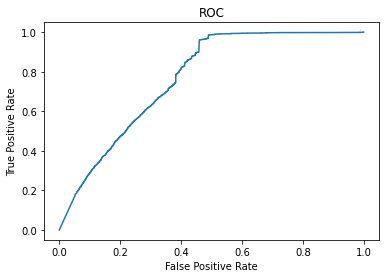

In [167]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

## Zipping the folder

In [168]:
!zip -r NLPCapstoneProjectUpgrad.zip NLPCapstoneProjectUpgrad/

	zip warning: name not matched: NLPCapstoneProjectUpgrad/

zip error: Nothing to do! (try: zip -r NLPCapstoneProjectUpgrad.zip . -i NLPCapstoneProjectUpgrad/)
